In [1]:
import pandas as pd

In [8]:
endpoints = ['do-register', 'add-company', 'get-stock-data', 'get-stock-users-and-companies', 'add-buy-offer', 'add-sell-offer']
dataToPlot = ['apiTime', 'queueSizeForward']
folders = ['1h']

In [30]:
folders = ['10 min', '1h']

In [3]:
hardware = '12_proc_30_ram'

In [37]:
hardware = '8_proc_20_ram'

In [4]:
tests = ['2_repliki', '4_repliki', '6_replik', '8_replik', '10_replik']

In [4]:
tests = ['transakcje_60s', 'transakcje_120s', 'transakcje_180s', 'transakcje_240s', 'transakcje_300s']

In [4]:
tests = ['zapytania_20ms', 'zapytania_100ms', 'zapytania_500ms', 'zapytania_1000ms', 'zapytania_2000ms']

In [11]:
tests = ['strategia1_200', 'strategia2_200', 'strategia3_200']

c:\users\rafal\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


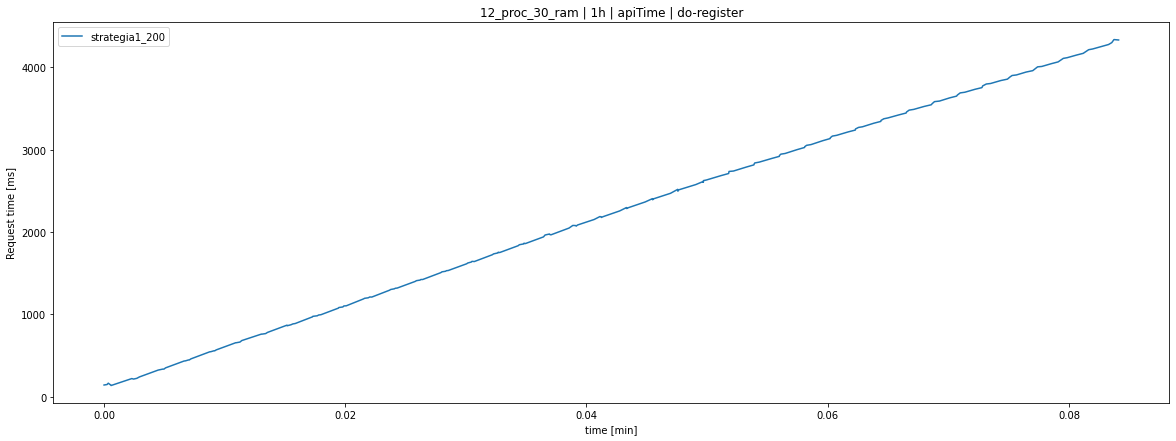

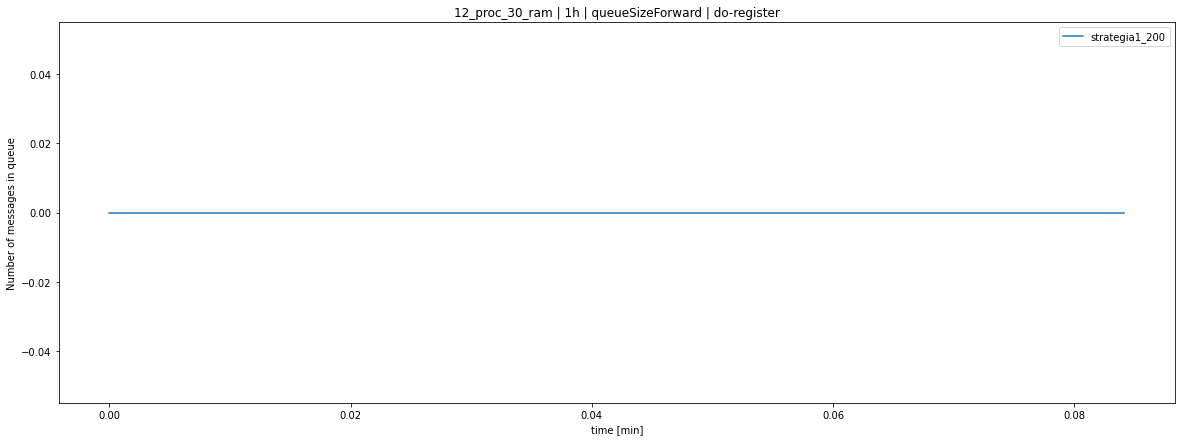

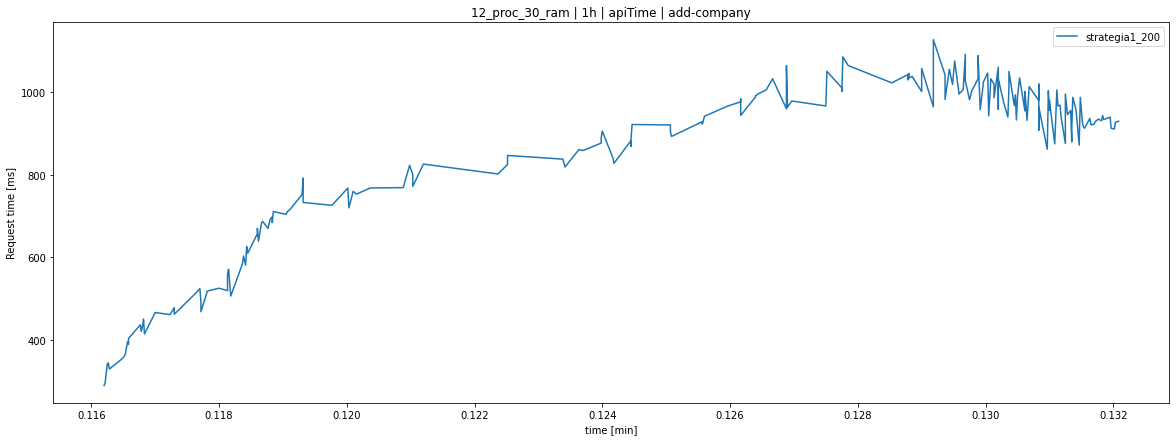

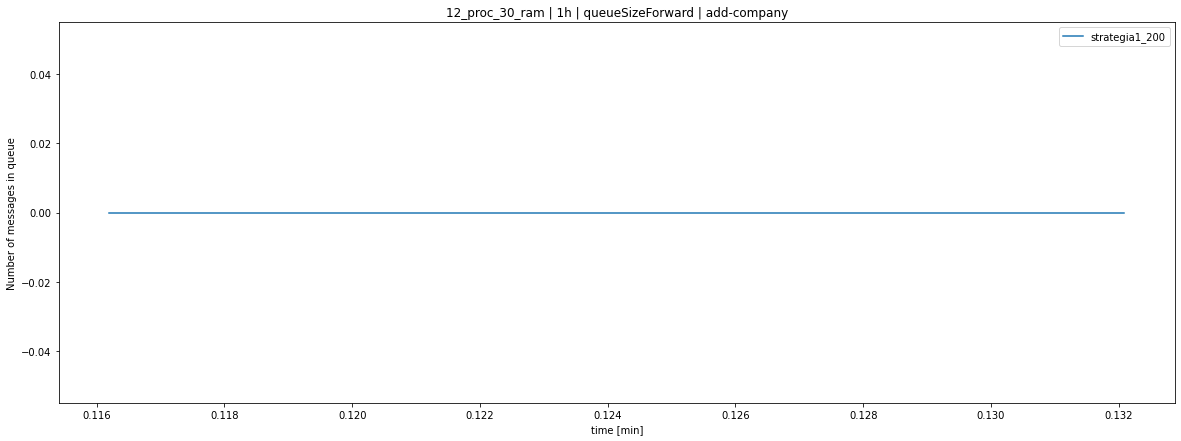

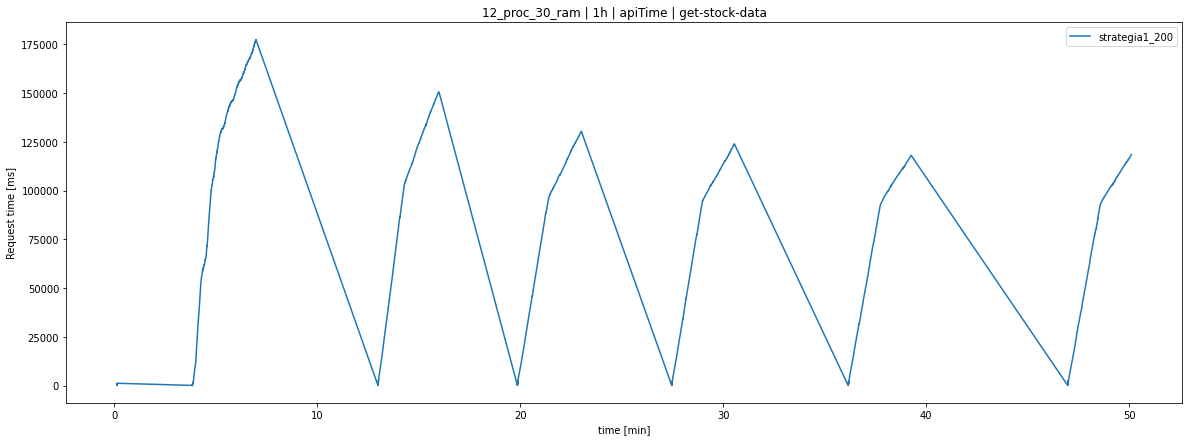

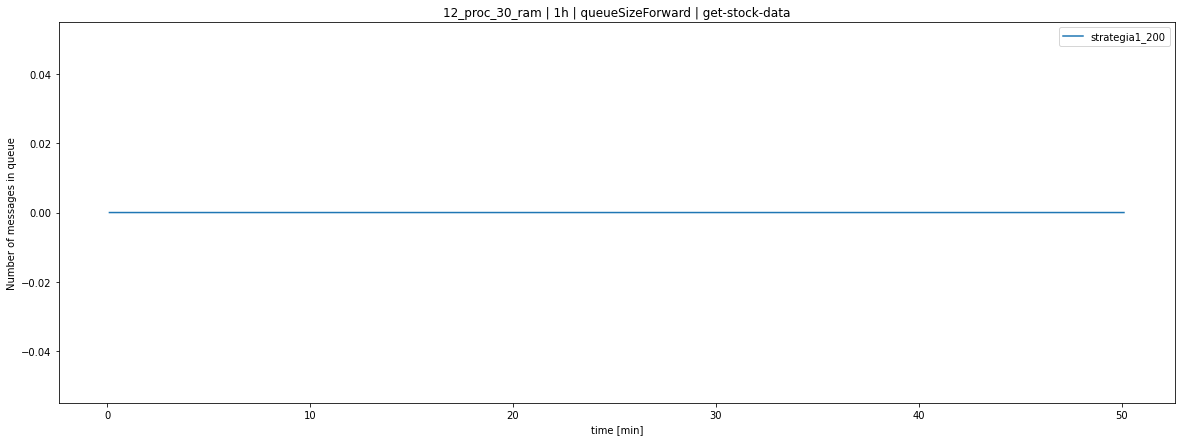

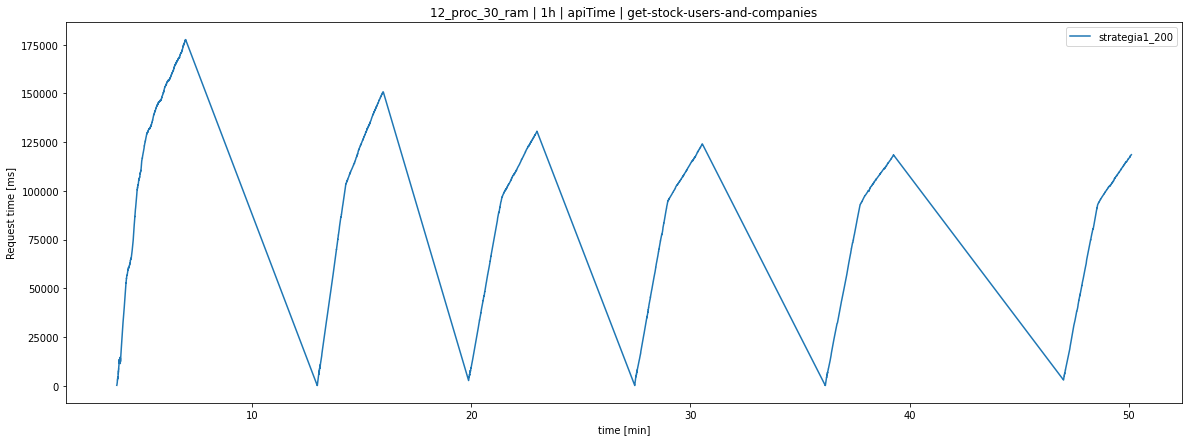

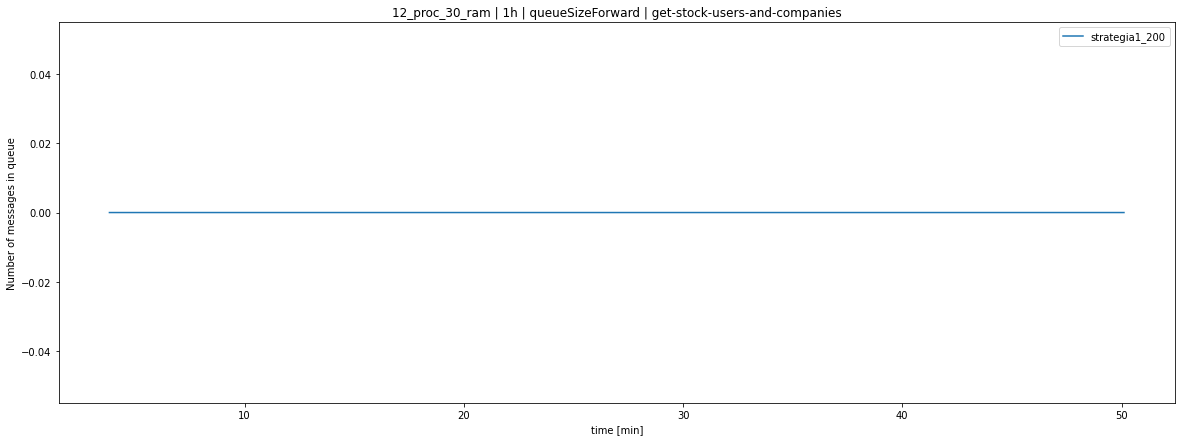

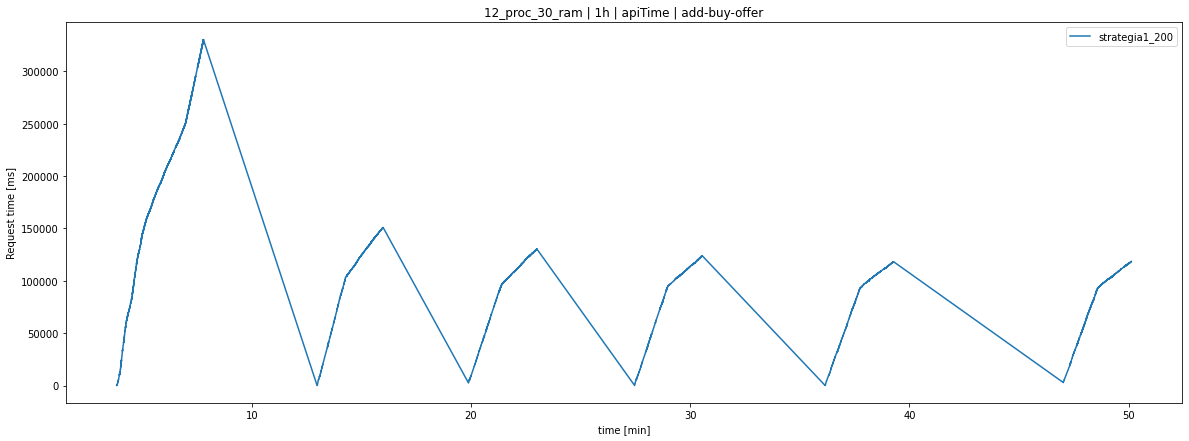

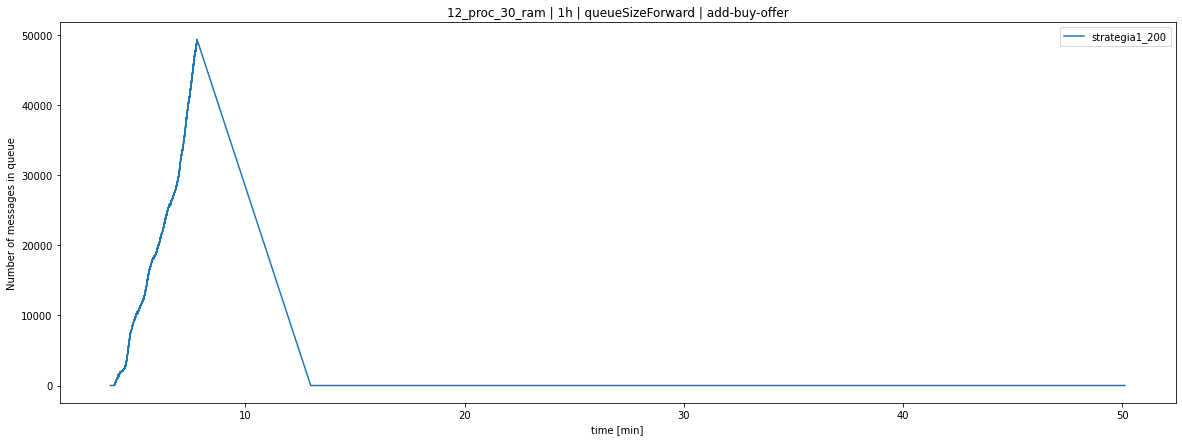

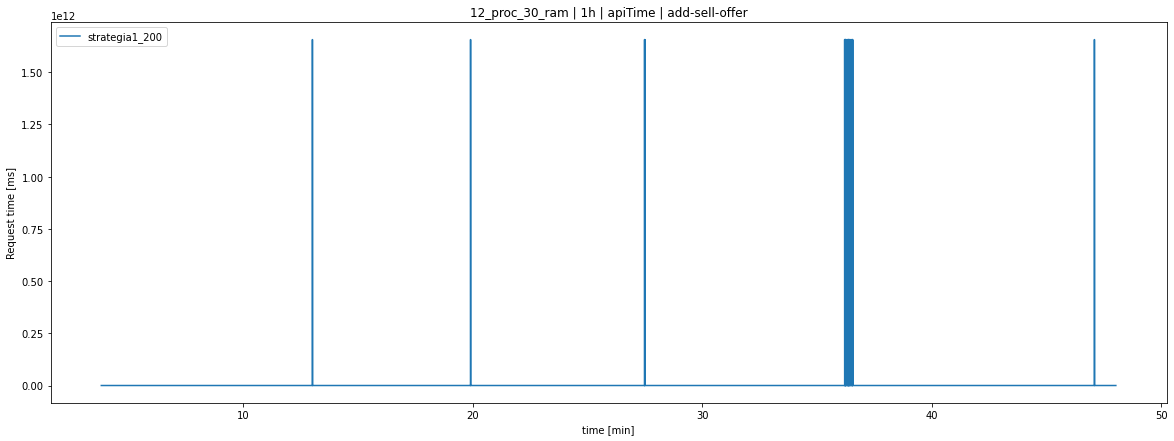

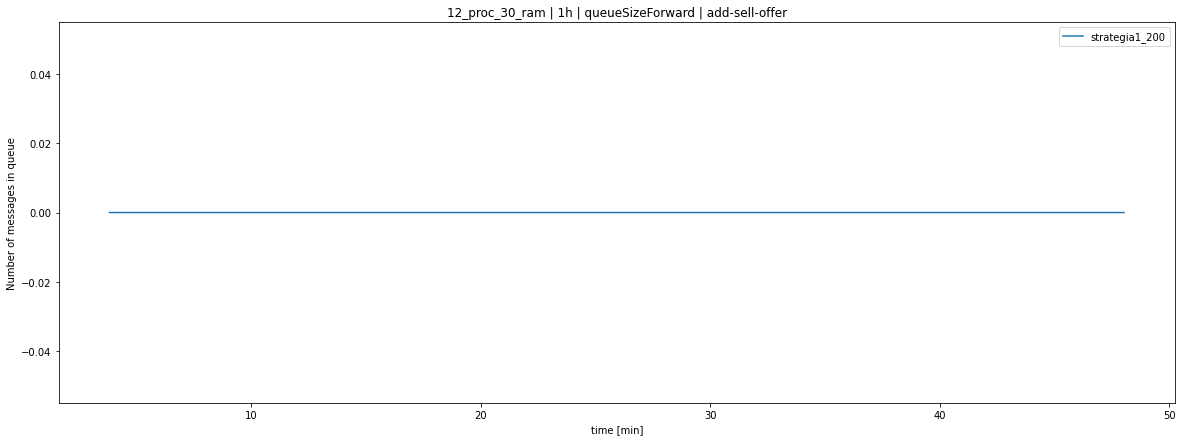

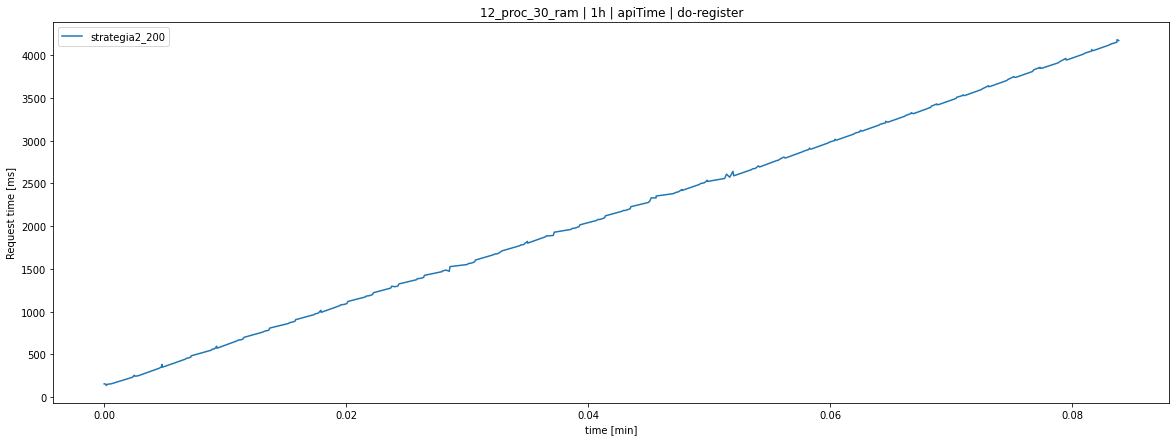

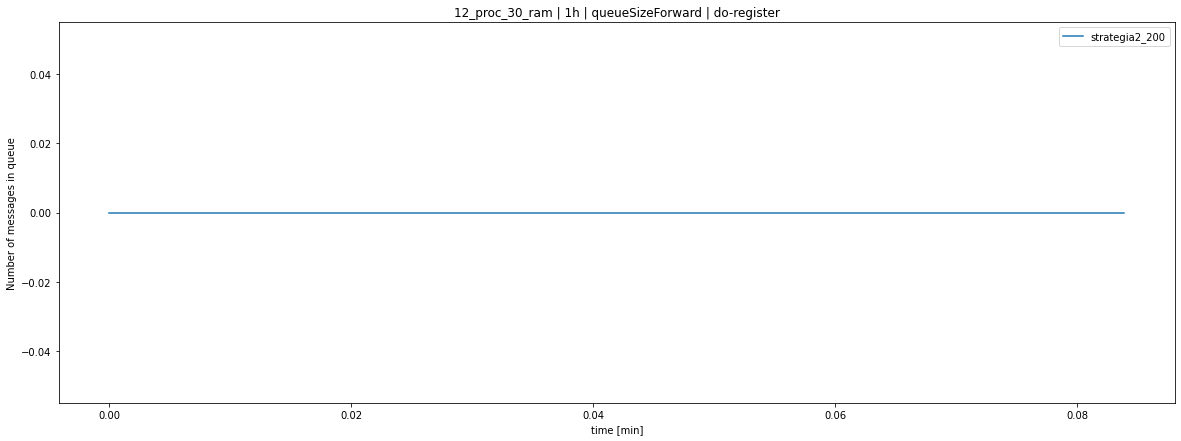

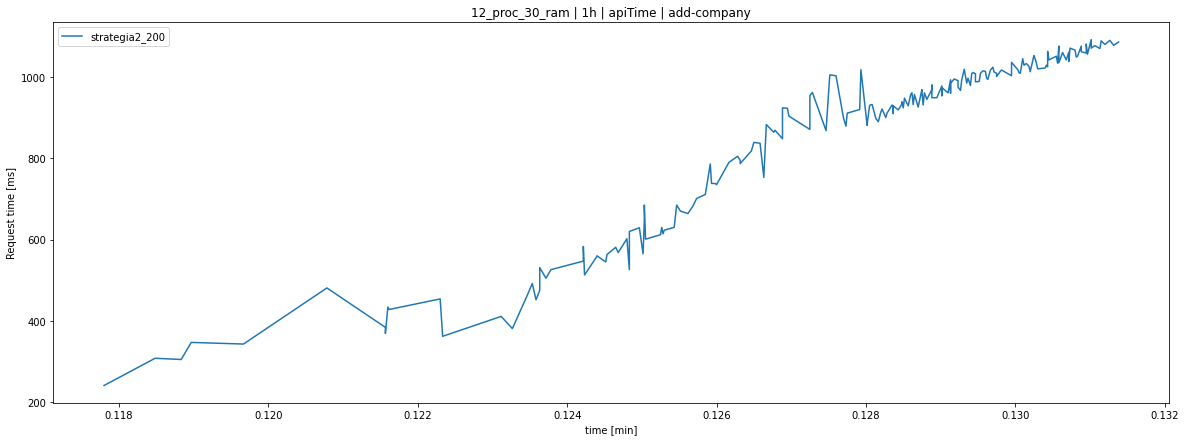

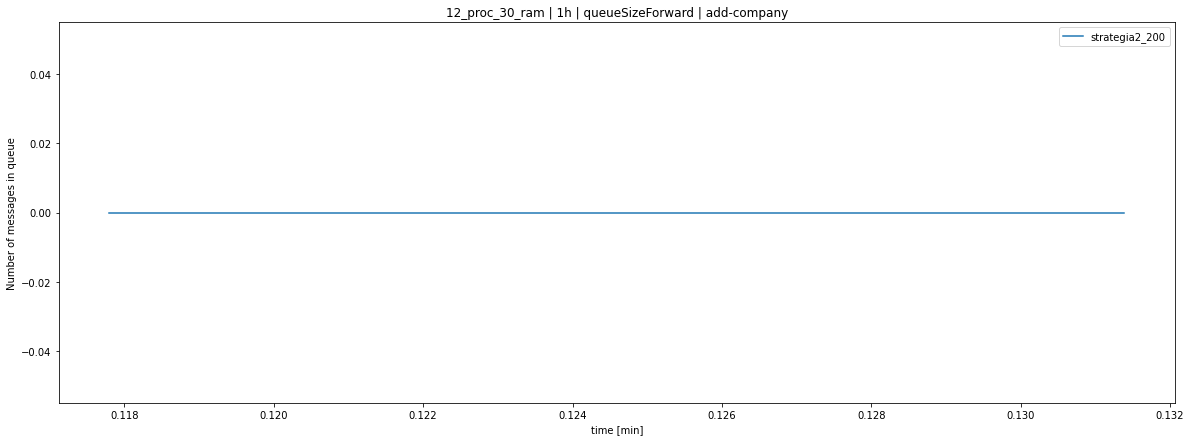

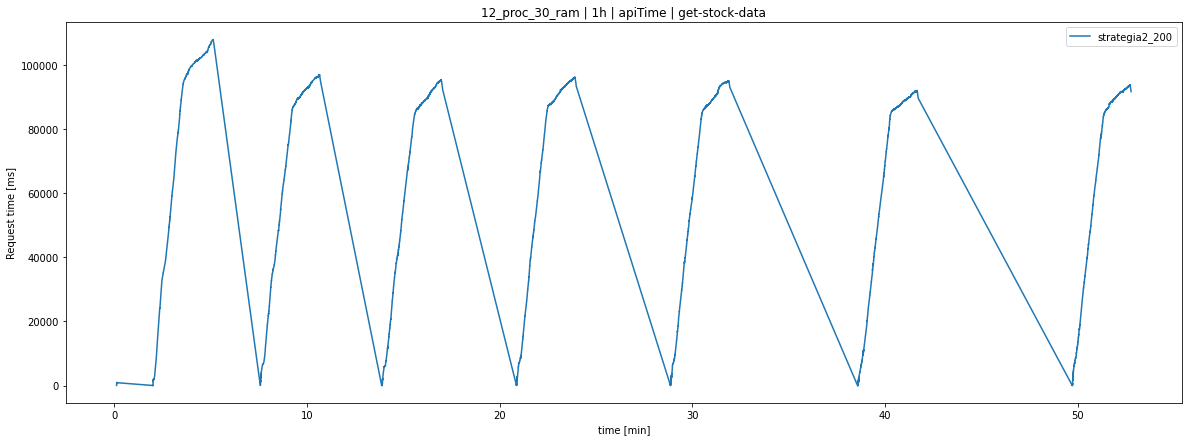

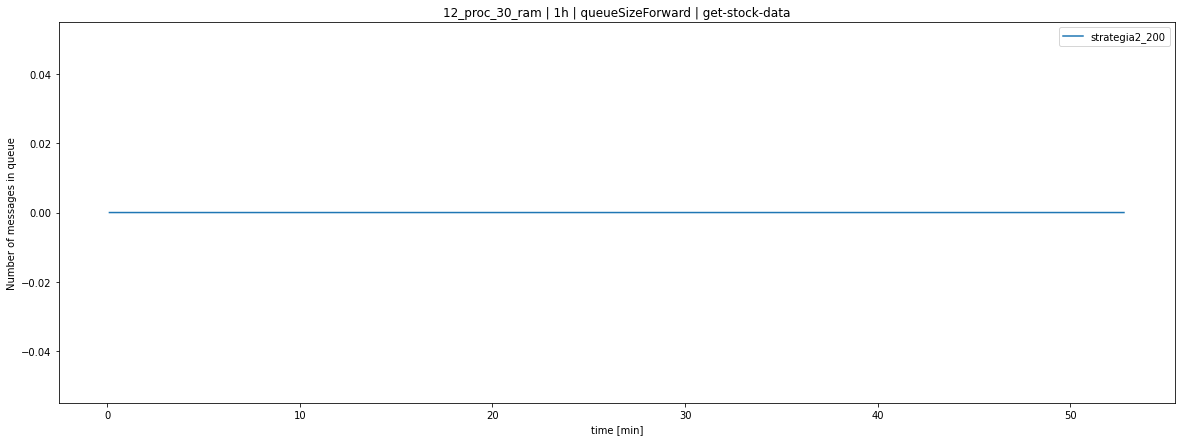

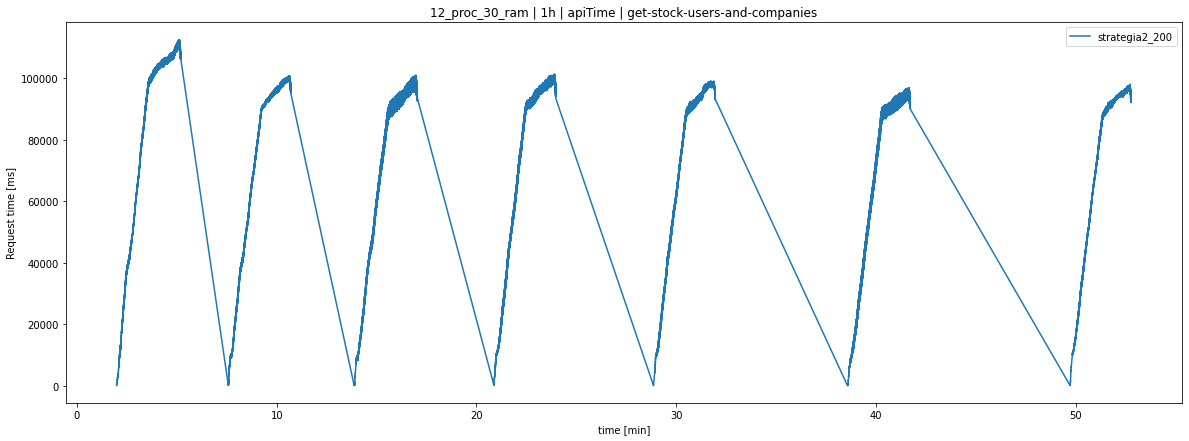

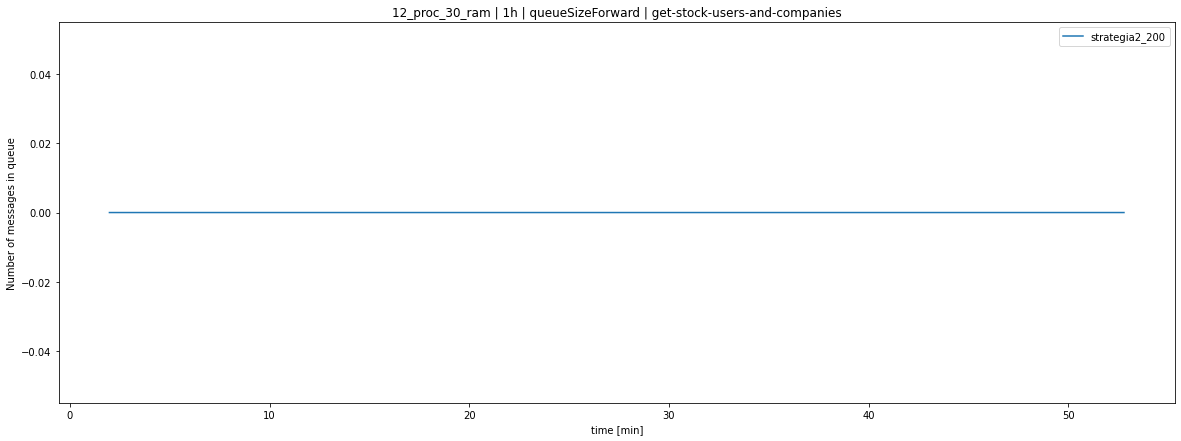

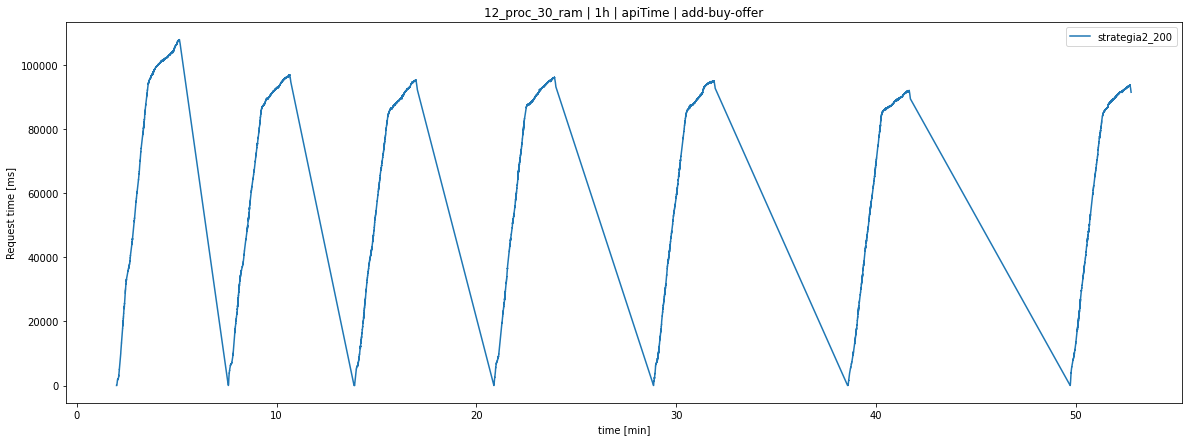

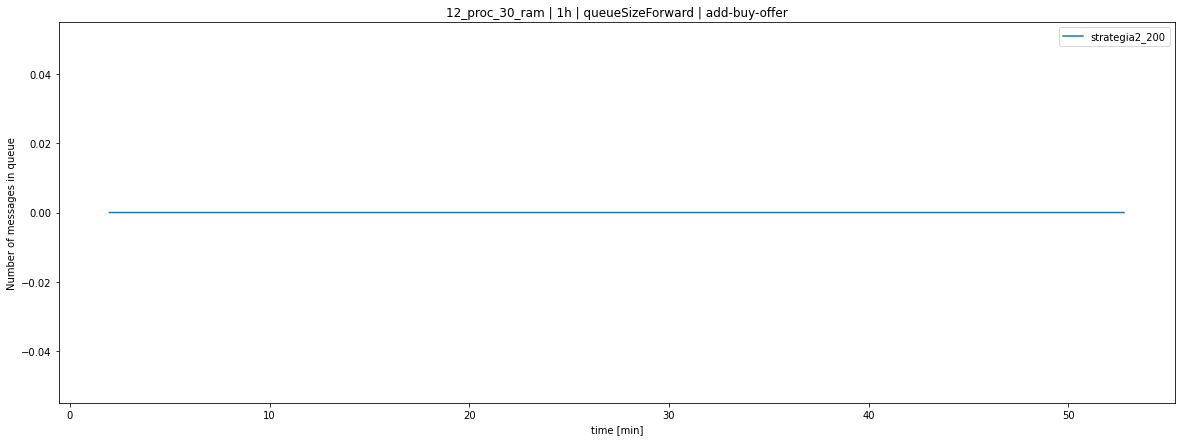

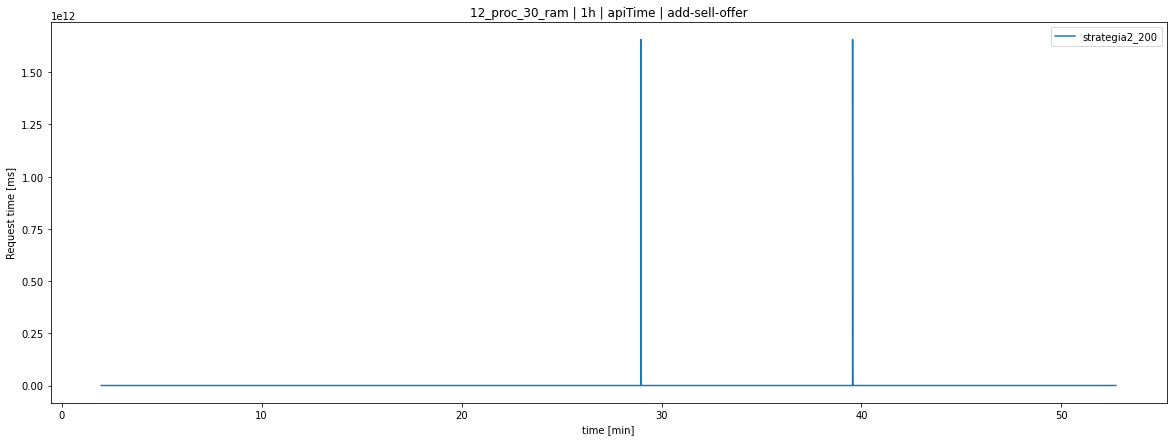

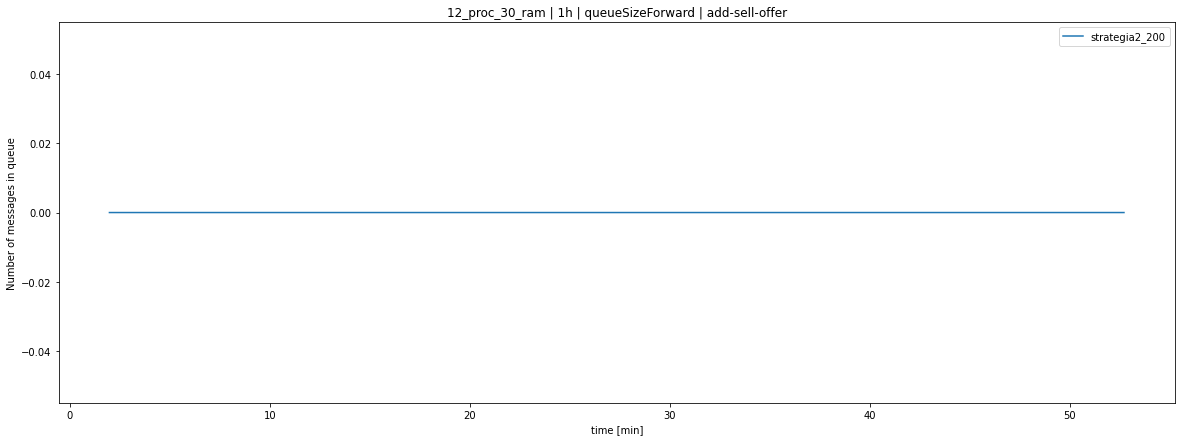

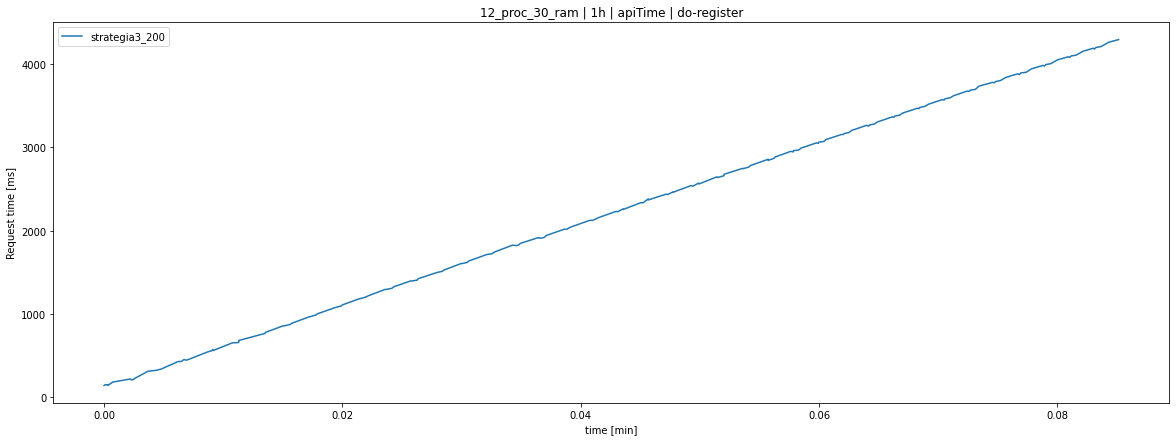

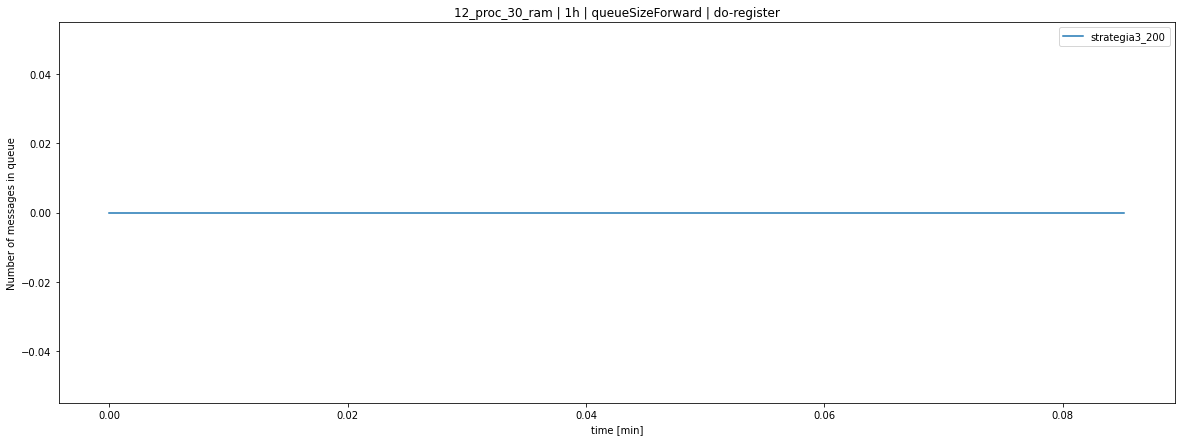

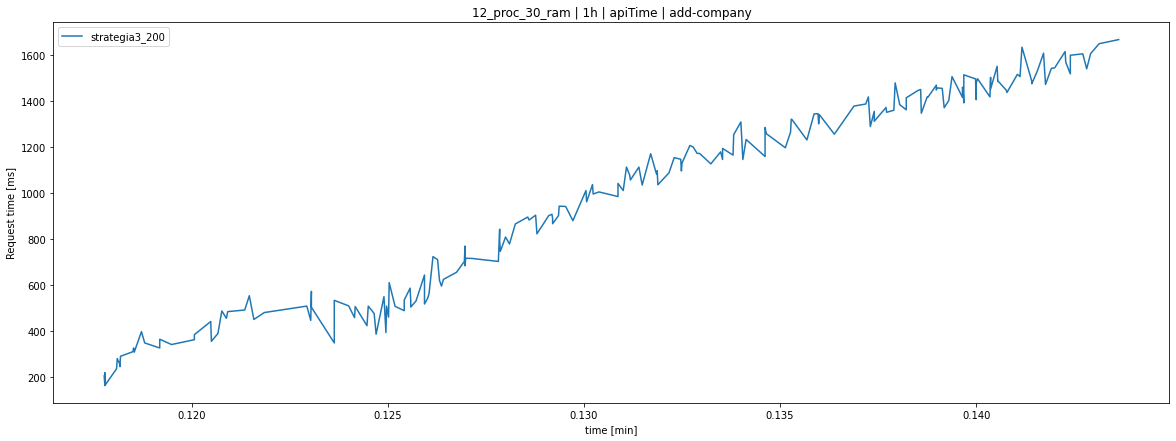

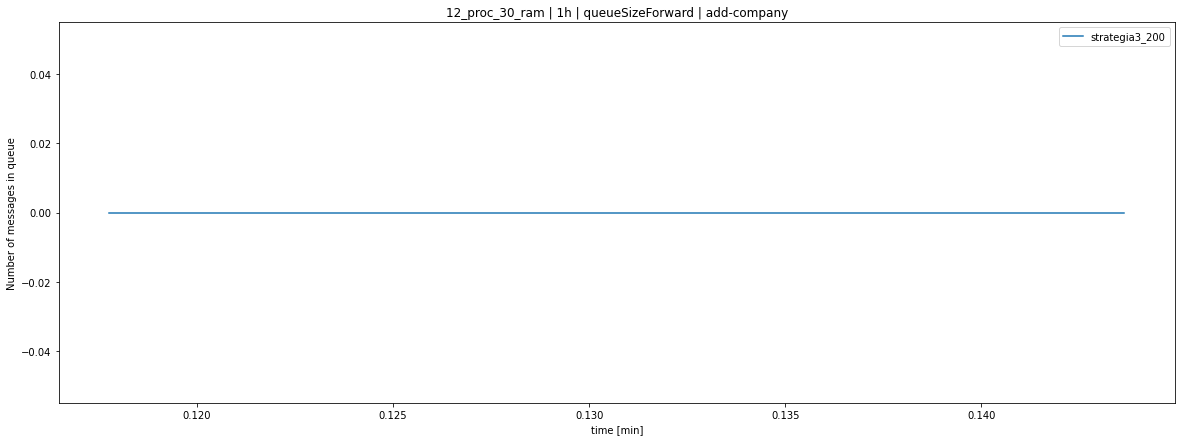

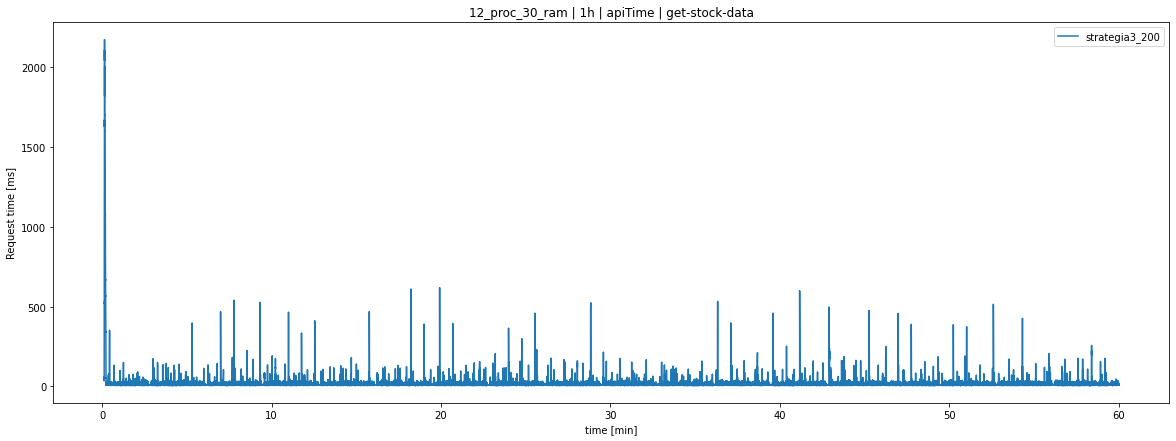

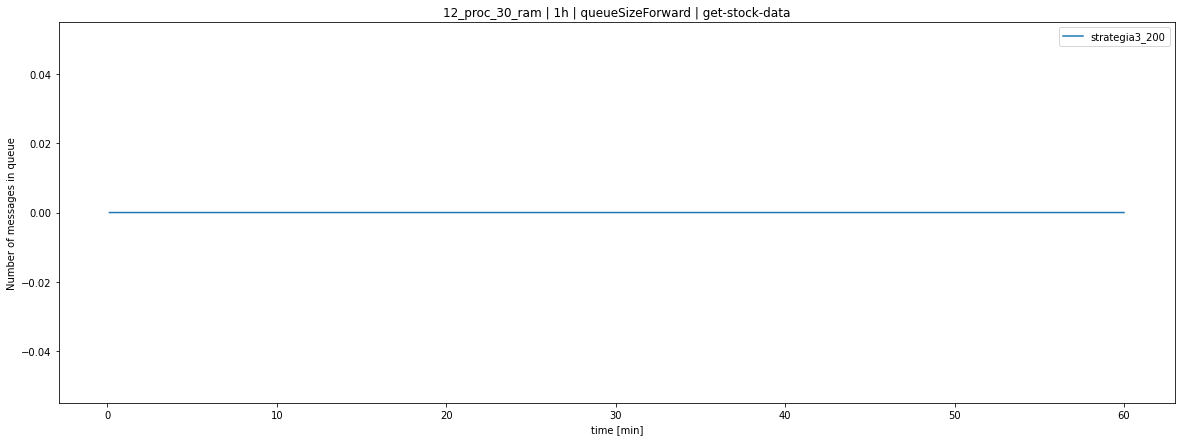

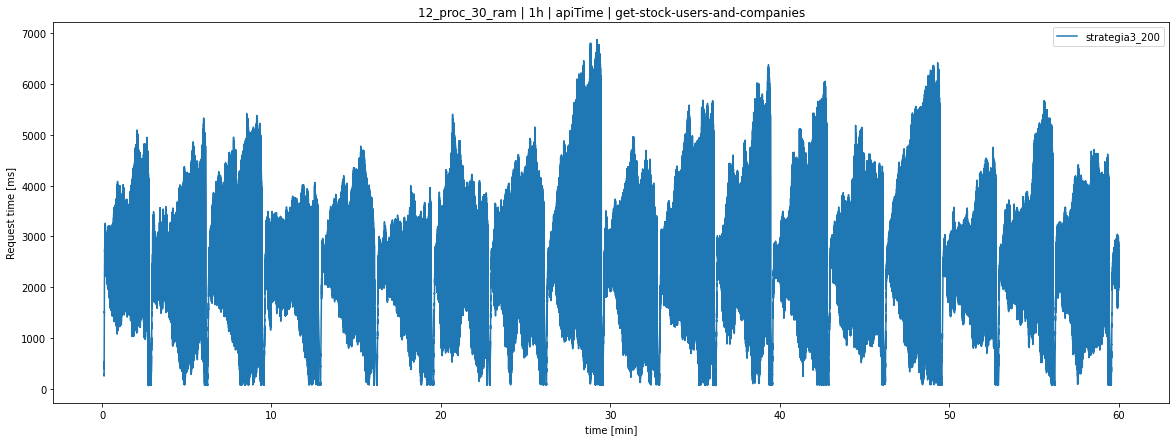

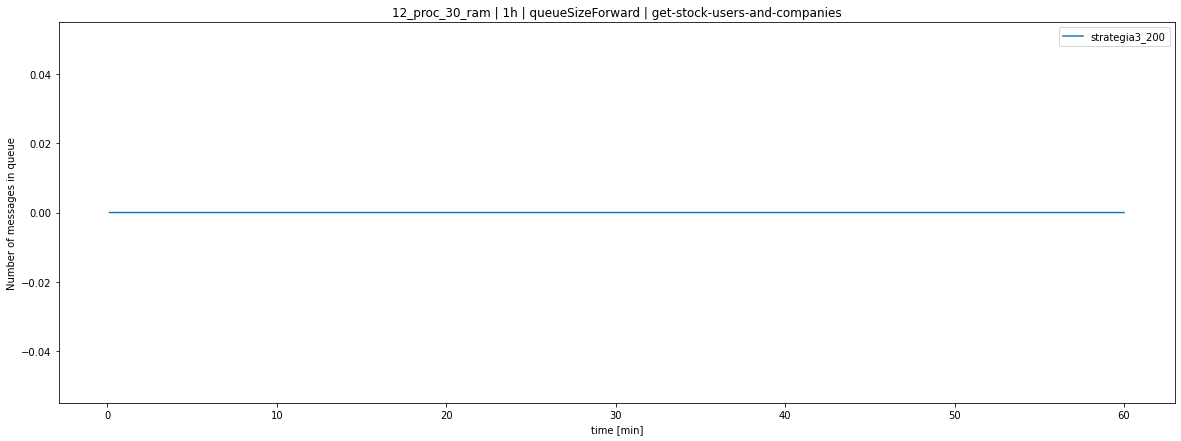

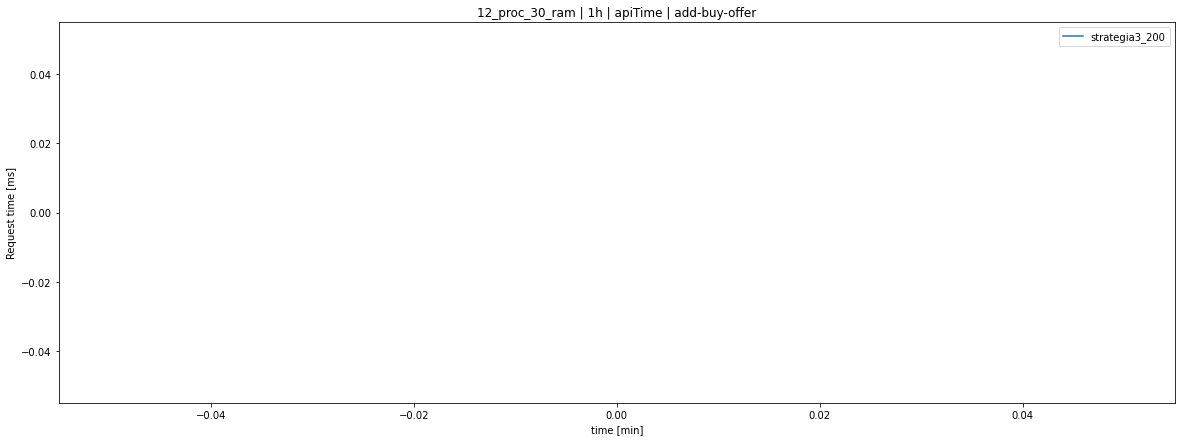

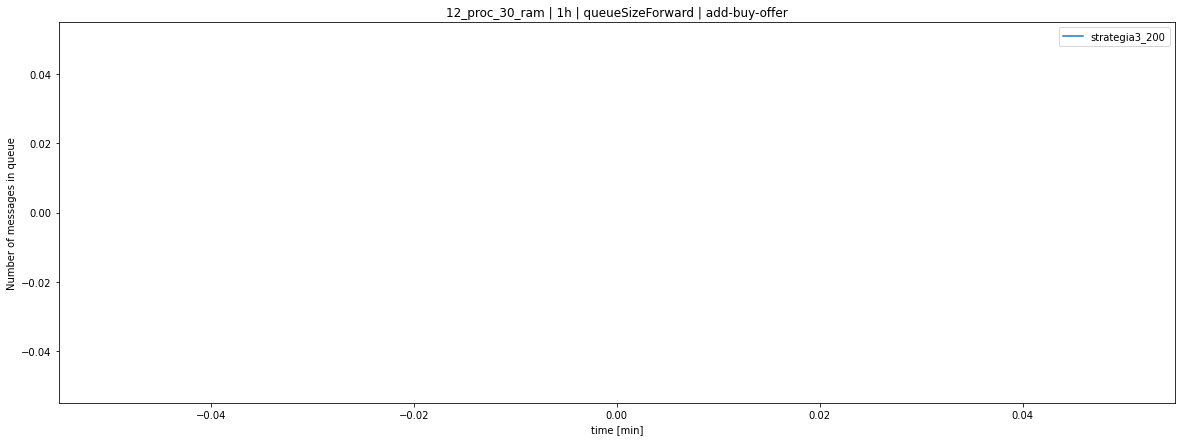

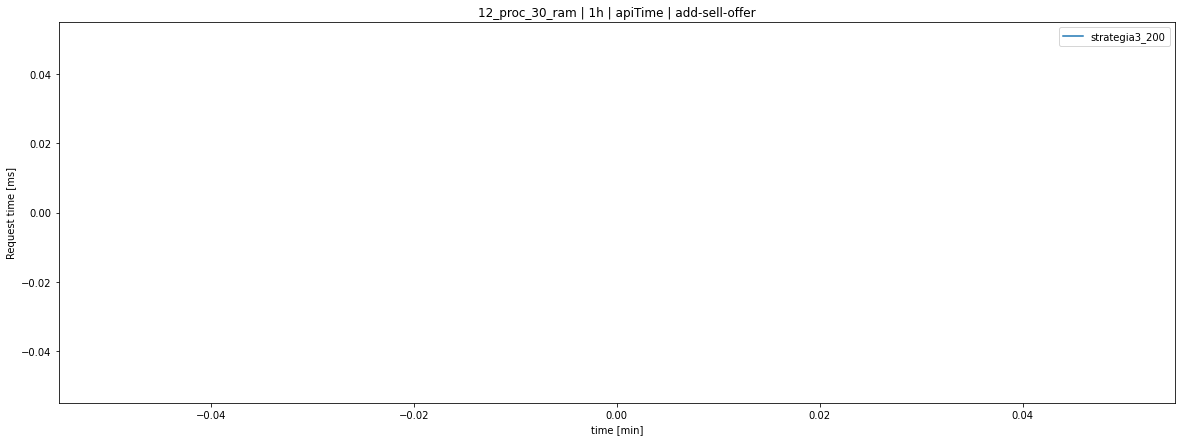

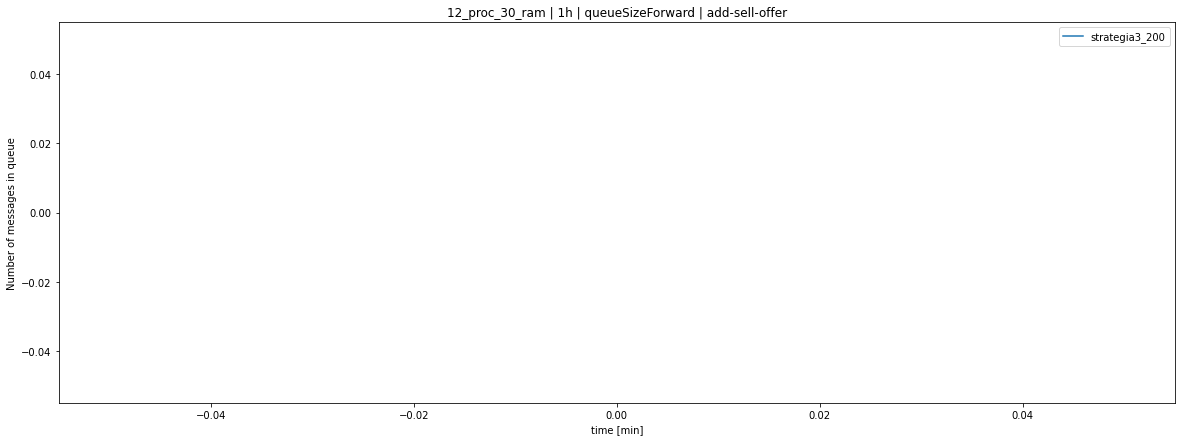

In [12]:
for f in folders:
    for i in tests:
        try:
            d = pd.read_csv('Testy/' + hardware + '/Testy/' + f + '/' + i + '/methods.csv')
        except:
            continue
        for e in endpoints:
            for j in dataToPlot:  
                data = pd.DataFrame()
                d = d.sort_values(by=['timestamp'])
                t = d['timestamp'][0]
                d['time [min]'] = d['timestamp'].apply(lambda x: (x - t)/60000)
                customDataFrame = pd.DataFrame({'time [min]': d[(d['endpointUrl'] == e)]['time [min]'], i: d[(d['endpointUrl'] == e)][j]})
                customDataFrame = customDataFrame.loc[customDataFrame['time [min]'] < 60]
                data = pd.concat([data, customDataFrame])
                ax = data.set_index('time [min]').plot(figsize=(20, 7), title = hardware + ' | ' + f + ' | ' + j + ' | ' + e)
                ax.set_xlabel("time [min]")
                if j == 'apiTime':
                    ax.set_ylabel("Request time [ms]")
                else:
                    ax.set_ylabel("Number of messages in queue")